# Storytelling Data Visualization on Exchange Rates

## Imports and data reading

In [2]:
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


In [4]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

- there is 41 column in the data 
- there is 5699 rows
- there are null-values in certain columns
- data type fo columns is mainly object datatype and 3 of float64 type


## Data cleaning

In [5]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

In [6]:
exchange_rates.head(3)

,Time,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],US_dollar,[South African rand ]
0,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
1,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
2,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307


In [7]:
euro_to_dollar = exchange_rates[['Time', 'US_dollar']]
euro_to_dollar['US_dollar'].value_counts()


US_dollar
-         62
1.2276     9
1.1215     8
1.1305     7
1.1797     6
          ..
1.2571     1
1.2610     1
1.2651     1
1.2632     1
1.2193     1
Name: count, Length: 3528, dtype: int64

In [8]:
euro_to_dollar = euro_to_dollar[~(euro_to_dollar['US_dollar'] == '-')]

In [9]:
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)

In [10]:
# Check if the cleaning is done correctly
euro_to_dollar['US_dollar'].value_counts()

US_dollar
1.2276    9
1.1215    8
1.1305    7
1.3373    6
1.3532    6
         ..
1.2571    1
1.2610    1
1.2651    1
1.2632    1
1.2193    1
Name: count, Length: 3527, dtype: int64

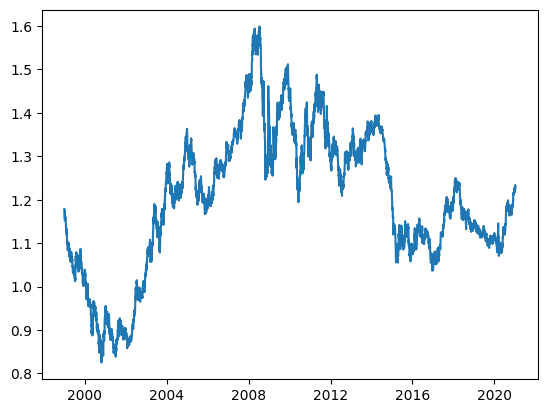

In [11]:
plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['US_dollar'])
plt.show()

In [12]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()
euro_to_dollar.head(50)

,Time,US_dollar,rolling_mean
0,1999-01-04,1.1789,NaN
1,1999-01-05,1.1790,NaN
2,1999-01-06,1.1743,NaN
3,1999-01-07,1.1632,NaN
4,1999-01-08,1.1659,NaN
5,1999-01-11,1.1569,NaN
6,1999-01-12,1.1520,NaN
7,1999-01-13,1.1744,NaN
8,1999-01-14,1.1653,NaN
9,1999-01-15,1.1626,NaN


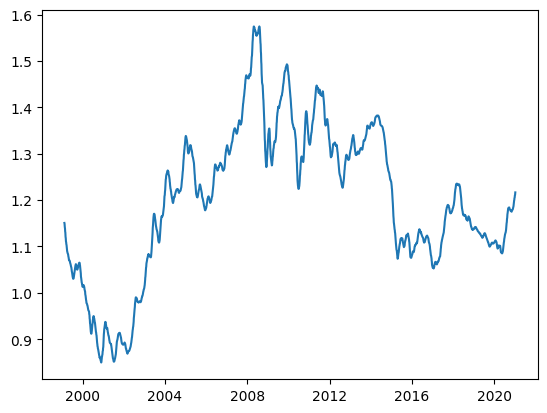

In [13]:
plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['rolling_mean'])
plt.show()

## Main visualization - exchange rates per president

We show comparatively how the euro-dollar rate changed under the last three US presidents (George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021)


In [14]:
bush = euro_to_dollar[(euro_to_dollar['Time'].dt.year >= 2001) &
                      (euro_to_dollar['Time'].dt.year <= 2009)]

obama = euro_to_dollar[(euro_to_dollar['Time'].dt.year > 2009) &
                      (euro_to_dollar['Time'].dt.year <= 2017)]

trump = euro_to_dollar[(euro_to_dollar['Time'].dt.year > 2017) &
                      (euro_to_dollar['Time'].dt.year <= 2021)]

set(bush['Time'].dt.year)

{2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009}

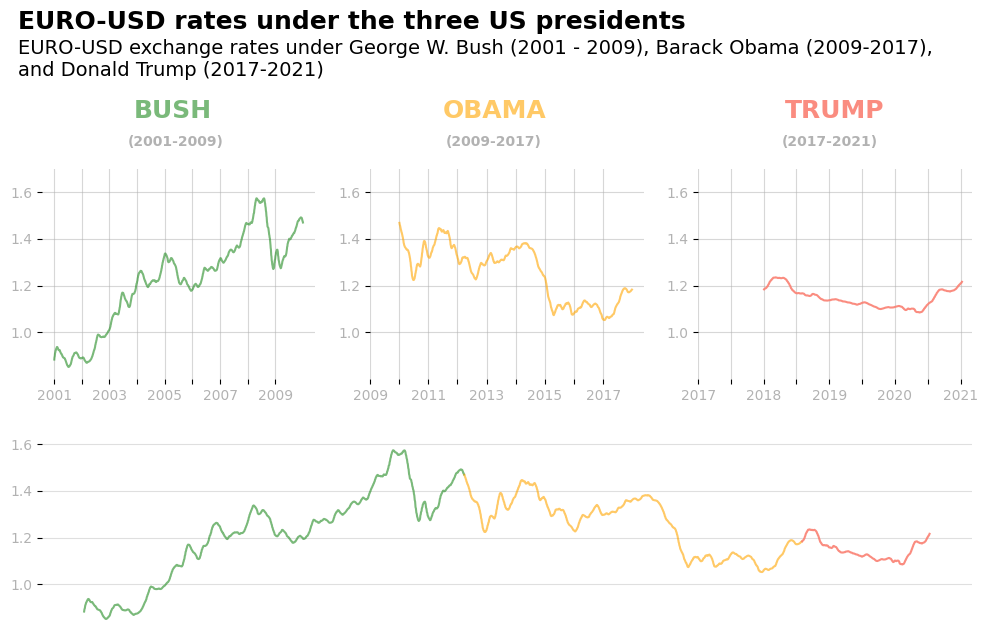

In [15]:
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(2, 3, 1)
ax2 = plt.subplot(2, 3, 2)
ax3 = plt.subplot(2, 3, 3)
ax4 = plt.subplot(2, 1, 2)

axes = [ax1, ax2, ax3, ax4]
for ax in axes:
    ax.set_ylim(0.8, 1.7)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels(['1.0', '1.2','1.4', '1.6'], alpha=0.3)
    ax.grid(alpha=0.5)
    for location in ['left', 'right', 'top', 'bottom']:
      ax.spines[location].set_visible(False)

ax1.plot(bush['Time'], bush['rolling_mean'], color='forestgreen', alpha=0.6)
ax1.set_xticks(['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009'])
ax1.set_xticklabels(['2001', '', '2003', '', '2005', '', '2007', '', '2009'], alpha=0.3)

ax1.text(12370, 1.92, 'BUSH', fontsize=18, weight='bold', color='forestgreen', alpha=0.6)
ax1.text(12300, 1.8, '(2001-2009)', weight='bold', alpha=0.3)


ax2.plot(obama['Time'], obama['rolling_mean'], color='orange', alpha=0.6)
ax2.set_xticks(['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'])
ax2.set_xticklabels(['2009', '', '2011', '', '2013', '', '2015', '', '2017'], alpha=0.3)

ax2.text(15150, 1.92, 'OBAMA', fontsize=18, weight='bold', color='orange', alpha=0.6)
ax2.text(15200, 1.8, '(2009-2017)', weight='bold', alpha=0.3)


ax3.plot(trump['Time'], trump['rolling_mean'], color='salmon', alpha=0.9)
ax3.set_xticks(['2017-01', '2017-07', '2018-01', '2018-07', '2019-01', '2019-07', '2020-01', '2020-07', '2021-01'])
ax3.set_xticklabels(['2017', '', '2018', '', '2019', '', '2020', '', '2021'], alpha=0.3)

ax3.text(17650, 1.92, 'TRUMP', fontsize=18, weight='bold', color='salmon', alpha=0.9)
ax3.text(17630, 1.8, '(2017-2021)', weight='bold', alpha=0.3)


ax4.plot(bush['Time'], bush['rolling_mean'], color='forestgreen', alpha=0.6)
ax4.plot(obama['Time'], obama['rolling_mean'], color='orange', alpha=0.6)
ax4.plot(trump['Time'], trump['rolling_mean'], color='salmon', alpha=0.9)

ax4.grid(alpha=0.4)
ax4.set_xticks([])

ax1.text(10840, 2.30, 'EURO-USD rates under the three US presidents',
         fontsize=18, weight='bold')
ax1.text(10840, 2.10, '''EURO-USD exchange rates under George W. Bush (2001 - 2009), Barack Obama (2009-2017),
and Donald Trump (2017-2021)''', fontsize=14)

plt.show()